In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_csv('data/cleaned_data_no_dummies.csv')

In [3]:
pd.set_option("max_rows", 200)
pd.set_option("max_columns", 200)

In [4]:
df.head()

,name1,age1,season1,tournament1,club1,apps1,mins1,shots (off target)1,shots (on target)1,shots (blocked)1,goals1,outside_of_box1,unsuccessful_dribbles1,successful_dribbles1,unsuccesful_touches1,dispossessed1,aerial_won1,aerial_lost1,total_passes1,accurate_long_pass1,inaccurate_long_pass1,accurate_short_pass1,inaccurate_short_pass1,accurate_crosses1,inaccurate_crosses1,long_key_pass1,short_key_pass1,assists1,age2,season2,tournament2,club2,apps2,mins2,shots (off target)2,shots (on target)2,shots (blocked)2,goals2,outside_of_box2,unsuccessful_dribbles2,successful_dribbles2,unsuccesful_touches2,dispossessed2,aerial_won2,aerial_lost2,total_passes2,accurate_long_pass2,inaccurate_long_pass2,accurate_short_pass2,inaccurate_short_pass2,accurate_crosses2,inaccurate_crosses2,long_key_pass2,short_key_pass2,assists2,age3,season3,tournament3,club3,apps3,mins3,shots (off target)3,shots (on target)3,shots (blocked)3,goals3,outside_of_box3,unsuccessful_dribbles3,successful_dribbles3,unsuccesful_touches3,dispossessed3,aerial_won3,aerial_lost3,total_passes3,accurate_long_pass3,inaccurate_long_pass3,accurate_short_pass3,inaccurate_short_pass3,accurate_crosses3,inaccurate_crosses3,long_key_pass3,short_key_pass3,assists3,age4,season4,tournament4,club4,apps4,mins4,shots (off target)4,shots (on target)4,shots (blocked)4,goals4,outside_of_box4,unsuccessful_dribbles4,successful_dribbles4,unsuccesful_touches4,dispossessed4,aerial_won4,aerial_lost4,total_passes4,accurate_long_pass4,inaccurate_long_pass4,accurate_short_pass4,inaccurate_short_pass4,accurate_crosses4,inaccurate_crosses4,long_key_pass4,short_key_pass4,assists4,shots_blocked/on_target_shots1,shots_blocked/on_target_shots2,shots_blocked/on_target_shots3,shots_blocked/on_target_shots4,cross_acc1,cross_acc2,cross_acc3,cross_acc4,kp_revised1,kp_revised2,kp_revised3,kp_revised4,G&A&KP 1,G&A&KP 2,G&A&KP 3,G&A&KP 4,future_performance,g_square_root 1,g_square_root 2,g_square_root 3,g_square_root 4,g_cube_root 1,g_cube_root 2,g_cube_root 3,g_cube_root 4
0,Aaron Hunt,24.0,2010,GB,WerderBremen,32.0,2313.0,0.7,0.6,0.5,0.3,0.0,1.0,1.1,0.0,2.3,0.2,0.3,31.9,1.5,0.5,23.7,6.2,31.9,1.5,0.3,1.1,0.2,25.0,2011,GB,WerderBremen,29.0,1895.0,0.4,0.3,0.2,0.1,0.1,1.0,0.8,1.5,2.0,0.2,0.6,28.1,1.1,1.0,21.2,4.8,28.1,1.1,0.6,1.0,0.1,26.0,2012,GB,WerderBremen,18.0,1599.0,0.7,0.7,0.9,0.2,0.1,1.3,2.6,0.8,2.2,0.6,0.7,44.2,2.5,1.8,32.3,7.6,44.2,2.5,0.8,1.9,0.2,27.0,2013.0,GB,WerderBremen,28.0,2346.0,1.2,0.9,0.9,0.4,0.1,1.1,1.8,1.1,2.8,0.6,1.1,41.6,2.9,1.6,30.3,6.8,41.6,2.9,0.9,1.2,0.1,0.833,0.667,1.286,1.000,0.955,0.962,0.946,0.935,44.66,44.96,119.34,87.36,1.9,1.8,3.1,2.6,2.85,0.547723,0.316228,0.447214,0.632456,0.669433,0.464159,0.584804,0.736806
1,Aaron Lennon,21.0,2010,EPL,Tottenham,22.0,1805.0,0.2,0.6,0.4,0.1,0.0,2.0,1.8,0.0,1.1,0.0,0.3,25.6,0.7,0.4,20.9,3.7,25.6,0.7,0.3,1.5,0.4,22.0,2011,EPL,Tottenham,34.0,2366.0,0.3,0.2,0.3,0.1,0.0,1.8,1.6,0.7,1.3,0.1,0.4,24.5,0.6,0.2,20.1,3.6,24.5,0.6,0.2,1.7,0.1,23.0,2012,EPL,Tottenham,23.0,1582.0,0.3,0.2,0.3,0.1,0.0,1.2,0.9,0.6,1.1,0.2,0.3,24.7,0.3,0.2,21.0,3.3,24.7,0.3,0.0,1.7,0.2,24.0,2013.0,EPL,Tottenham,34.0,2840.0,0.2,0.2,0.4,0.1,0.0,1.5,1.3,0.9,1.1,0.2,0.3,25.9,0.5,0.1,21.4,3.9,25.9,0.5,0.1,1.9,0.2,0.667,1.500,1.500,2.000,0.973,0.976,0.988,0.981,46.08,46.55,41.99,51.80,2.3,2.1,2.0,2.3,2.15,0.316228,0.316228,0.316228,0.316228,0.464159,0.464159,0.464159,0.464159
2,Aaron Ramsey,19.0,2010,EPL,Arsenal,18.0,780.0,0.4,0.3,0.3,0.2,0.1,0.4,0.6,0.0,1.6,0.7,0.5,34.8,2.4,0.7,27.4,4.3,34.8,2.4,0.1,0.7,0.2,20.0,2011,EPL,Arsenal,7.0,356.0,0.4,0.3,0.7,0.1,0.0,0.3,0.1,0.9,0.6,0.0,0.7,42.9,3.0,0.6,35.4,3.9,42.9,3.0,0.1,0.7,0.0,21.0,2012,EPL,Arsenal,34.0,2466.0,0.9,0.5,0.4,0.1,0.0,0.6,1.0,1.6,2.6,0.3,0.6,56.6,3.1,0.9,46.4,6.3,56.6,3.1,0.2,1.4,0.1,22.0,2013.0,EPL,Arsenal,36.0,2087.0,0.5,0.3,0.4,0.0,0.0,1.0,0.9,0.6,1.2,0.4,0.6,53.7,2.9,1.0,44.5,5.4,53.7,2.9,0.1,1.2,0.1,1.000,2.333,0.800,1.333,0.935,0.935,0.948,0.949,27.84,34.32,90.56,69.81,1.2,0.9,1.8,1.4,1.60,0.447214,0.316228,0.316228,0.000000,0.58

In [5]:
def aggregate_getter(stat):
    df[stat + ' (aggregated)'] = (df[stat + '1'] + df[stat + '2'] + df[stat + '3']+ df[stat + '4'])/4


In [12]:
df.select_dtypes(include=['float64', 'int64']).iloc[:, :]

,age1,season1,apps1,mins1,shots (off target)1,shots (on target)1,shots (blocked)1,goals1,outside_of_box1,unsuccessful_dribbles1,successful_dribbles1,unsuccesful_touches1,dispossessed1,aerial_won1,aerial_lost1,total_passes1,accurate_long_pass1,inaccurate_long_pass1,accurate_short_pass1,inaccurate_short_pass1,accurate_crosses1,inaccurate_crosses1,long_key_pass1,short_key_pass1,assists1,age2,season2,apps2,mins2,shots (off target)2,shots (on target)2,shots (blocked)2,goals2,outside_of_box2,unsuccessful_dribbles2,successful_dribbles2,unsuccesful_touches2,dispossessed2,aerial_won2,aerial_lost2,total_passes2,accurate_long_pass2,inaccurate_long_pass2,accurate_short_pass2,inaccurate_short_pass2,accurate_crosses2,inaccurate_crosses2,long_key_pass2,short_key_pass2,assists2,age3,season3,apps3,mins3,shots (off target)3,shots (on target)3,shots (blocked)3,goals3,outside_of_box3,unsuccessful_dribbles3,successful_dribbles3,unsuccesful_touches3,dispossessed3,aerial_won3,aerial_lost3,total_passes3,accurate_long_pass3,inaccurate_long_pass3,accurate_short_pass3,inaccurate_short_pass3,accurate_crosses3,inaccurate_crosses3,long_key_pass3,short_key_pass3,assists3,age4,season4,apps4,mins4,shots (off target)4,shots (on target)4,shots (blocked)4,goals4,outside_of_box4,unsuccessful_dribbles4,successful_dribbles4,unsuccesful_touches4,dispossessed4,aerial_won4,aerial_lost4,total_passes4,accurate_long_pass4,inaccurate_long_pass4,accurate_short_pass4,inaccurate_short_pass4,accurate_crosses4,inaccurate_crosses4,long_key_pass4,short_key_pass4,assists4,shots_blocked/on_target_shots1,shots_blocked/on_target_shots2,shots_blocked/on_target_shots3,shots_blocked/on_target_shots4,cross_acc1,cross_acc2,cross_acc3,cross_acc4,kp_revised1,kp_revised2,kp_revised3,kp_revised4,G&A&KP 1,G&A&KP 2,G&A&KP 3,G&A&KP 4,future_performance,g_square_root 1,g_square_root 2,g_square_root 3,g_square_root 4,g_cube_root 1,g_cube_root 2,g_cube_root 3,g_cube_root 4
0,24.0,2010,32.0,2313.0,0.7,0.6,0.50,0.3,0.0,1.0,1.1,0.0,2.3,0.2,0.3,31.9,1.5,0.5,23.7,6.2,31.9,1.5,0.3,1.1,0.2,25.0,2011,29.0,1895.0,0.4,0.3,0.20,0.1,0.1,1.0,0.8,1.5,2.0,0.2,0.6,28.1,1.1,1.0,21.2,4.8,28.1,1.1,0.6,1.0,0.1,26.0,2012,18.0,1599.0,0.7,0.7,0.90,0.2,0.1,1.3,2.6,0.8,2.2,0.6,0.7,44.2,2.5,1.8,32.3,7.6,44.2,2.5,0.8,1.9,0.2,27.0,2013.0,28.0,2346.0,1.2,0.9,0.90,0.4,0.1,1.1,1.8,1.1,2.8,0.6,1.1,41.6,2.9,1.6,30.3,6.8,41.6,2.9,0.9,1.2,0.1,0.833,0.667,1.286,1.000,0.955,0.962,0.946,0.935,44.66,44.96,119.34,87.36,1.9,1.8,3.1,2.6,2.85,0.547723,0.316228,0.447214,0.632456,0.669433,0.464159,0.584804,0.736806
1,21.0,2010,22.0,1805.0,0.2,0.6,0.40,0.1,0.0,2.0,1.8,0.0,1.1,0.0,0.3,25.6,0.7,0.4,20.9,3.7,25.6,0.7,0.3,1.5,0.4,22.0,2011,34.0,2366.0,0.3,0.2,0.30,0.1,0.0,1.8,1.6,0.7,1.3,0.1,0.4,24.5,0.6,0.2,20.1,3.6,24.5,0.6,0.2,1.7,0.1,23.0,2012,23.0,1582.0,0.3,0.2,0.30,0.1,0.0,1.2,0.9,0.6,1.1,0.2,0.3,24.7,0.3,0.2,21.0,3.3,24.7,0.3,0.0,1.7,0.2,24.0,2013.0,34.0,2840.0,0.2,0.2,0.40,0.1,0.0,1.5,1.3,0.9,1.1,0.2,0.3,25.9,0.5,0.1,21.4,3.9,25.9,0.5,0.1,1.9,0.2,0.667,1.500,1.500,2.000,0.973,0.976,0.988,0.981,46.08,46.55,41.99,51.80,2.3,2.1,2.0,2.3,2.15,0.316228,0.316228,0.316228,0.316228,0.464159,0.464159,0.464159,0.464159
2,19.0,2010,18.0,780.0,0.4,0.3,0.30,0.2,0.1,0.4,0.6,0.0,1.6,0.7,0.5,34.8,2.4,0.7,27.4,4.3,34.8,2.4,0.1,0.7,0.2,20.0,2011,7.0,356.0,0.4,0.3,0.70,0.1,0.0,0.3,0.1,0.9,0.6,0.0,0.7,42.9,3.0,0.6,35.4,3.9,42.9,3.0,0.1,0.7,0.0,21.0,2012,34.0,2466.0,0.9,0.5,0.40,0.1,0.0,0.6,1.0,1.6,2.6,0.3,0.6,56.6,3.1,0.9,46.4,6.3,56.6,3.1,0.2,1.4,0.1,22.0,2013.0,36.0,2087.0,0.5,0.3,0.40,0.0,0.0,1.0,0.9,0.6,1.2,0.4,0.6,53.7,2.9,1.0,44.5,5.4,53.7,2.9,0.1,1.2,0.1,1.000,2.333,0.800,1.333,0.935,0.935,0.948,0.949,27.84,34.32,90.56,69.81,1.2,0.9,1.8,1.4,1.60,0.447214,0.316228,0.316228,0.000000,0.584804,0.464159,0.464159,0.000000
3,23.0,2014,23.0,1764.0,0.5,1.2,0.50,0.4,0.0,1.8,1.3,0.8,1.3,0.5,0.9,65.9,3.3,1.4,52.3,8.9,65.9,3.3,0.1,1.3,0.3,24.0,2015,29.0,2010.0,1.0,0.6,0.60,0.2,0.0,1.3,0.9,1.5,1.2,0.6,0.7,56.6,2.0,1.3,46.6,6.6,56.6,2.0,0.1,1.5,0.2,25.0,2016,31.0,26

In [13]:
for column in df.select_dtypes(include=['float64', 'int64']).iloc[:, :].drop(columns = ['future_performance']).columns:
        aggregate_getter(column[:-1])


In [14]:
df.head()

,name1,age1,season1,tournament1,club1,apps1,mins1,shots (off target)1,shots (on target)1,shots (blocked)1,goals1,outside_of_box1,unsuccessful_dribbles1,successful_dribbles1,unsuccesful_touches1,dispossessed1,aerial_won1,aerial_lost1,total_passes1,accurate_long_pass1,inaccurate_long_pass1,accurate_short_pass1,inaccurate_short_pass1,accurate_crosses1,inaccurate_crosses1,long_key_pass1,short_key_pass1,assists1,age2,season2,tournament2,club2,apps2,mins2,shots (off target)2,shots (on target)2,shots (blocked)2,goals2,outside_of_box2,unsuccessful_dribbles2,successful_dribbles2,unsuccesful_touches2,dispossessed2,aerial_won2,aerial_lost2,total_passes2,accurate_long_pass2,inaccurate_long_pass2,accurate_short_pass2,inaccurate_short_pass2,accurate_crosses2,inaccurate_crosses2,long_key_pass2,short_key_pass2,assists2,age3,season3,tournament3,club3,apps3,mins3,shots (off target)3,shots (on target)3,shots (blocked)3,goals3,outside_of_box3,unsuccessful_dribbles3,successful_dribbles3,unsuccesful_touches3,dispossessed3,aerial_won3,aerial_lost3,total_passes3,accurate_long_pass3,inaccurate_long_pass3,accurate_short_pass3,inaccurate_short_pass3,accurate_crosses3,inaccurate_crosses3,long_key_pass3,short_key_pass3,assists3,age4,season4,tournament4,club4,apps4,mins4,shots (off target)4,shots (on target)4,shots (blocked)4,goals4,outside_of_box4,unsuccessful_dribbles4,successful_dribbles4,unsuccesful_touches4,dispossessed4,aerial_won4,aerial_lost4,total_passes4,accurate_long_pass4,inaccurate_long_pass4,accurate_short_pass4,inaccurate_short_pass4,accurate_crosses4,inaccurate_crosses4,long_key_pass4,short_key_pass4,assists4,shots_blocked/on_target_shots1,shots_blocked/on_target_shots2,shots_blocked/on_target_shots3,shots_blocked/on_target_shots4,cross_acc1,cross_acc2,cross_acc3,cross_acc4,kp_revised1,kp_revised2,kp_revised3,kp_revised4,G&A&KP 1,G&A&KP 2,G&A&KP 3,G&A&KP 4,future_performance,g_square_root 1,g_square_root 2,g_square_root 3,g_square_root 4,g_cube_root 1,g_cube_root 2,g_cube_root 3,g_cube_root 4,age (aggregated),season (aggregated),apps (aggregated),mins (aggregated),shots (off target) (aggregated),shots (on target) (aggregated),shots (blocked) (aggregated),goals (aggregated),outside_of_box (aggregated),unsuccessful_dribbles (aggregated),successful_dribbles (aggregated),unsuccesful_touches (aggregated),dispossessed (aggregated),aerial_won (aggregated),aerial_lost (aggregated),total_passes (aggregated),accurate_long_pass (aggregated),inaccurate_long_pass (aggregated),accurate_short_pass (aggregated),inaccurate_short_pass (aggregated),accurate_crosses (aggregated),inaccurate_crosses (aggregated),long_key_pass (aggregated),short_key_pass (aggregated),assists (aggregated),shots_blocked/on_target_shots (aggregated),cross_acc (aggregated),kp_revised (aggregated),G&A&KP (aggregated),g_square_root (aggregated),g_cube_root (aggregated)
0,Aaron Hunt,24.0,2010,GB,WerderBremen,32.0,2313.0,0.7,0.6,0.5,0.3,0.0,1.0,1.1,0.0,2.3,0.2,0.3,31.9,1.5,0.5,23.7,6.2,31.9,1.5,0.3,1.1,0.2,25.0,2011,GB,WerderBremen,29.0,1895.0,0.4,0.3,0.2,0.1,0.1,1.0,0.8,1.5,2.0,0.2,0.6,28.1,1.1,1.0,21.2,4.8,28.1,1.1,0.6,1.0,0.1,26.0,2012,GB,WerderBremen,18.0,1599.0,0.7,0.7,0.9,0.2,0.1,1.3,2.6,0.8,2.2,0.6,0.7,44.2,2.5,1.8,32.3,7.6,44.2,2.5,0.8,1.9,0.2,27.0,2013.0,GB,WerderBremen,28.0,2346.0,1.2,0.9,0.9,0.4,0.1,1.1,1.8,1.1,2.8,0.6,1.1,41.6,2.9,1.6,30.3,6.8,41.6,2.9,0.9,1.2,0.1,0.833,0.667,1.286,1.000,0.955,0.962,0.946,0.935,44.66,44.96,119.34,87.36,1.9,1.8,3.1,2.6,2.85,0.547723,0.316228,0.447214,0.632456,0.669433,0.464159,0.584804,0.736806,25.5,2011.5,26.75,2038.25,0.75,0.625,0.625,0.250,0.075,1.100,1.575,0.850,2.325,0.400,0.675,36.450,2.000,1.225,26.875,6.350,36.450,2.000,0.650,1.300,0.150,0.94650,0.94950,74.0800,2.350,0.485905,0.613800
1,Aaron Lennon,21.0,2010,EPL,Tottenham,22.0,1805.0,0.2,0.6,0.4,0.1,0.0,2.0,1.8,0.0,1.1,0.0,0.3,25.6,0.7,0.4,20.9,3.7,25.6,0.7,0.3,1.5,0.4,22.0,2011,EPL,Tottenham,34.0,2366.0,0.3,0.2,0.3,0.1,0.0,1.8,1.6,0.7,1.3,0.1,0.4,24.5,0.6,0.2,20.1,3.6,24.5,0.6,0.2,1.

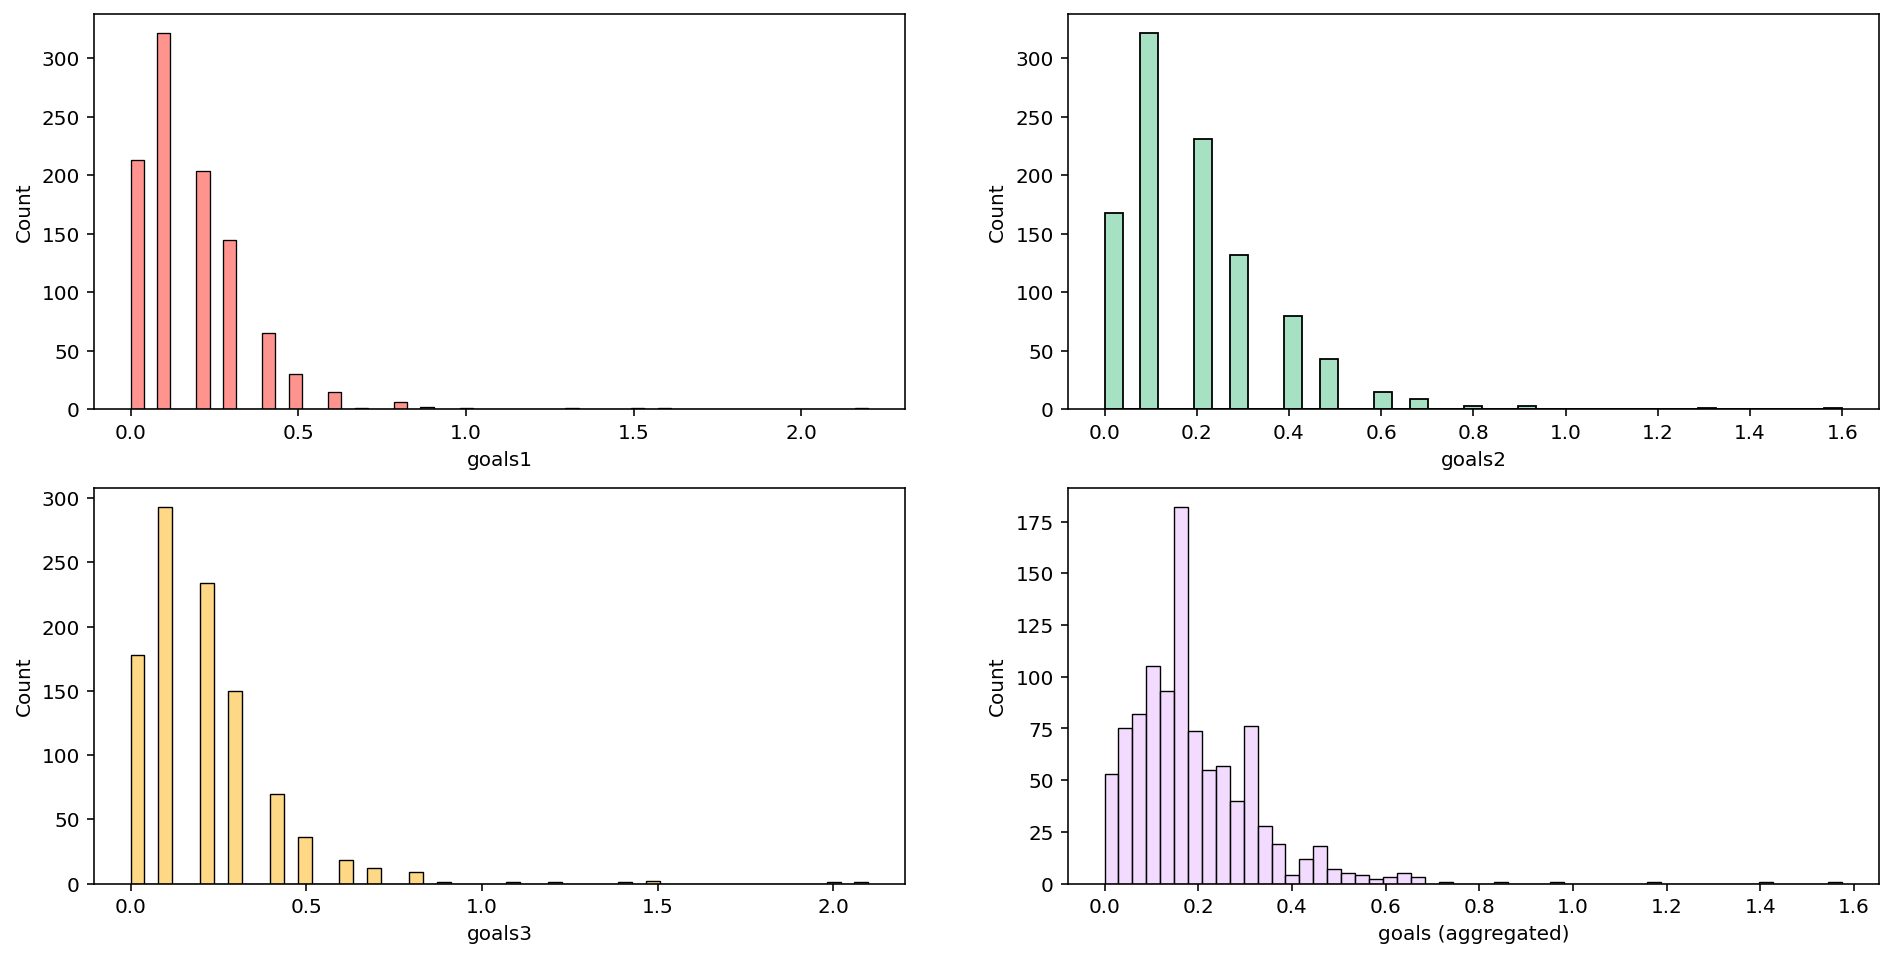

In [53]:
fig, axes = plt.subplots(2,2, figsize = (16,8))
axes[0, 0] = sns.histplot(df['goals1'], ax = axes[0, 0], color = '#ff6f69')
axes[0, 1] = sns.histplot(df['goals2'], ax = axes[0, 1], color = '#88d8b0')
axes[1, 0] = sns.histplot(df['goals3'], ax = axes[1,0], color = '#ffcc5c')
axes[1, 1] = sns.histplot(df['goals (aggregated)'], ax = axes[1,1], color = 'xkcd:pale lavender')
plt.savefig('images/goal_hists.png', dpi = 400, bbox_inches = "tight", transparent = True)

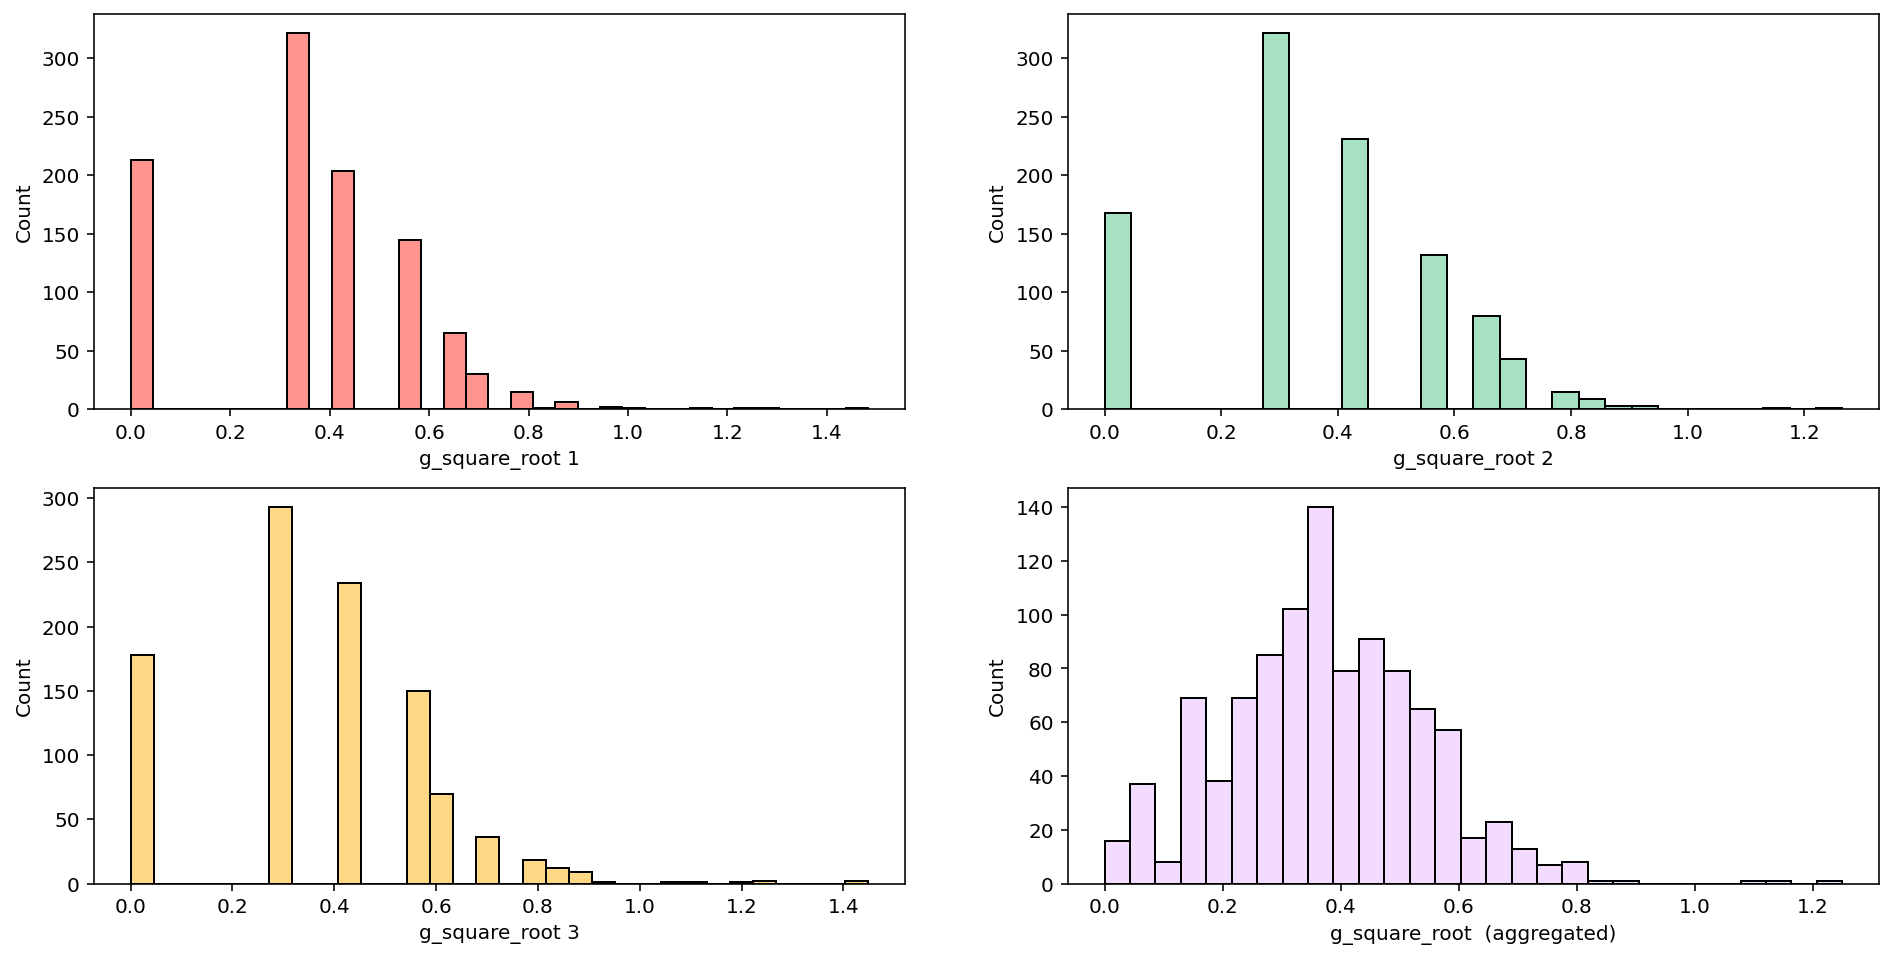

In [54]:
fig, axes = plt.subplots(2,2, figsize = (16,8))
axes[0, 0] = sns.histplot(df['g_square_root 1'], ax = axes[0, 0], color = '#ff6f69')
axes[0, 1] = sns.histplot(df['g_square_root 2'], ax = axes[0, 1], color = '#88d8b0')
axes[1, 0] = sns.histplot(df['g_square_root 3'], ax = axes[1,0], color = '#ffcc5c')
axes[1, 1] = sns.histplot(df['g_square_root  (aggregated)'], ax = axes[1,1], color = 'xkcd:pale lavender')
plt.savefig('images/root_goal_hists.png', dpi = 400, bbox_inches = "tight", transparent = True)

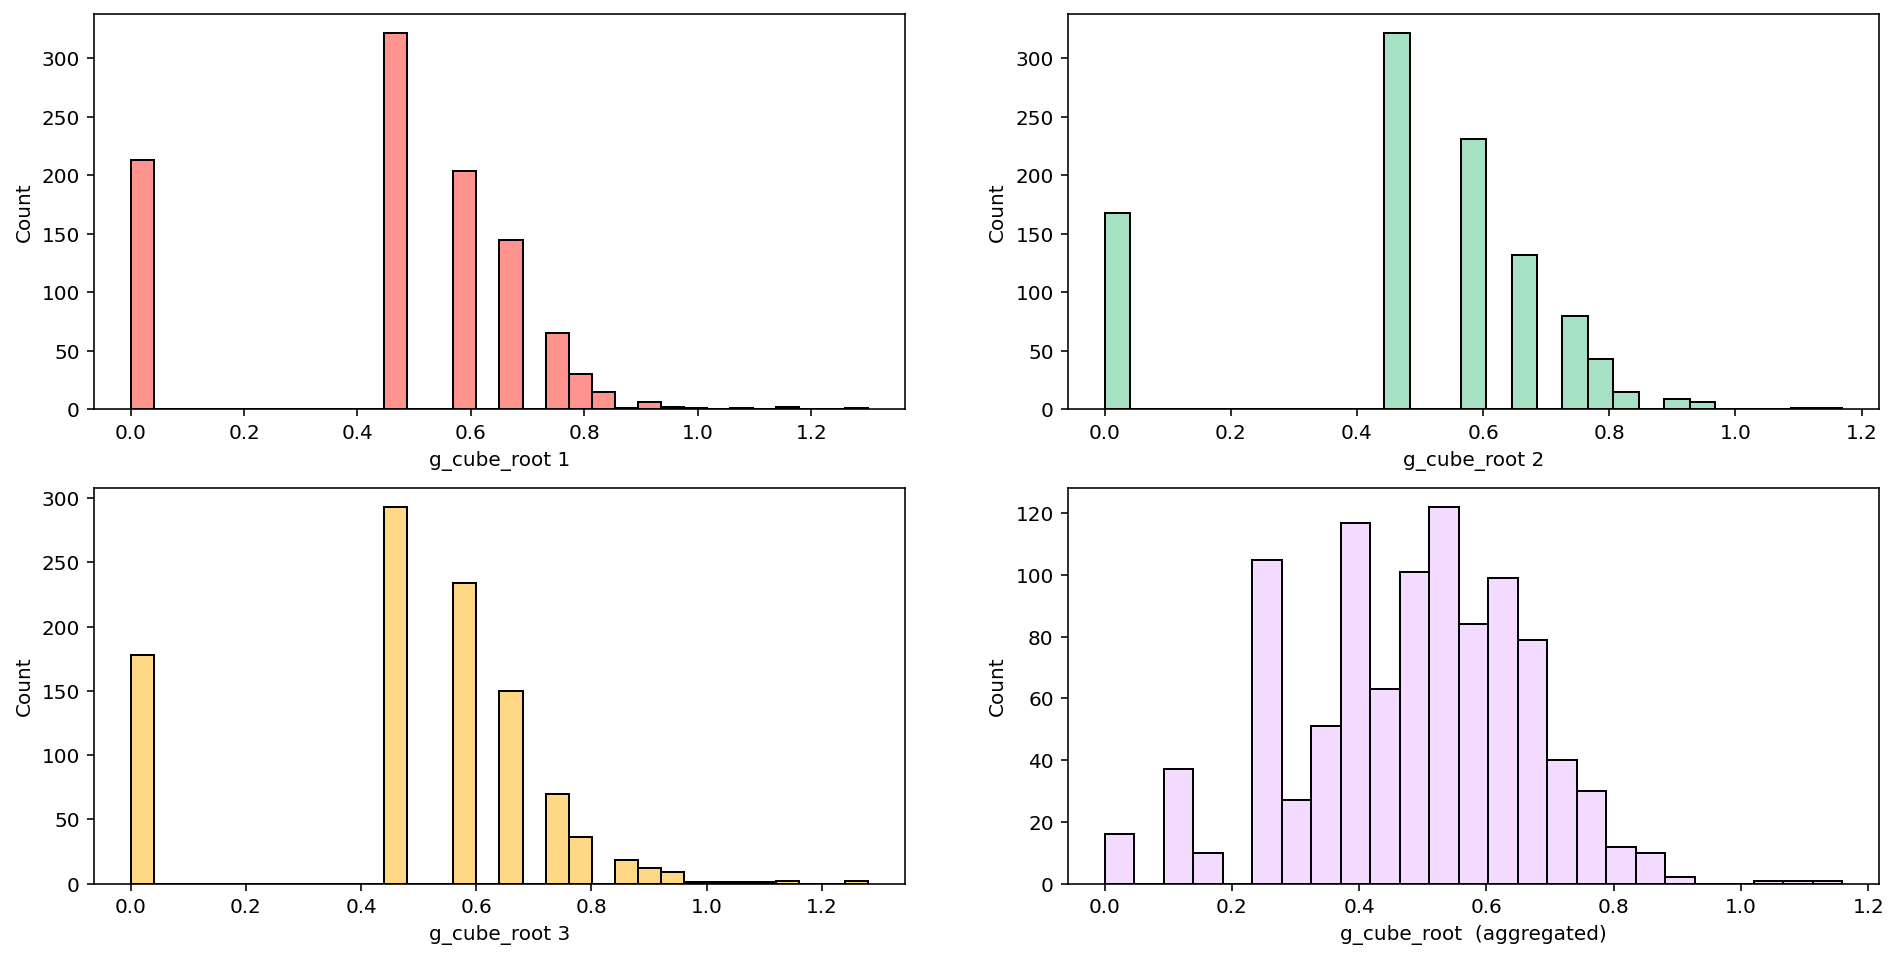

In [17]:
fig, axes = plt.subplots(2,2, figsize = (16,8))
axes[0, 0] = sns.histplot(df['g_cube_root 1'], ax = axes[0, 0], color = '#ff6f69')
axes[0, 1] = sns.histplot(df['g_cube_root 2'], ax = axes[0, 1], color = '#88d8b0')
axes[1, 0] = sns.histplot(df['g_cube_root 3'], ax = axes[1,0], color = '#ffcc5c')
axes[1, 1] = sns.histplot(df['g_cube_root  (aggregated)'], ax = axes[1,1], color = 'xkcd:pale lavender');

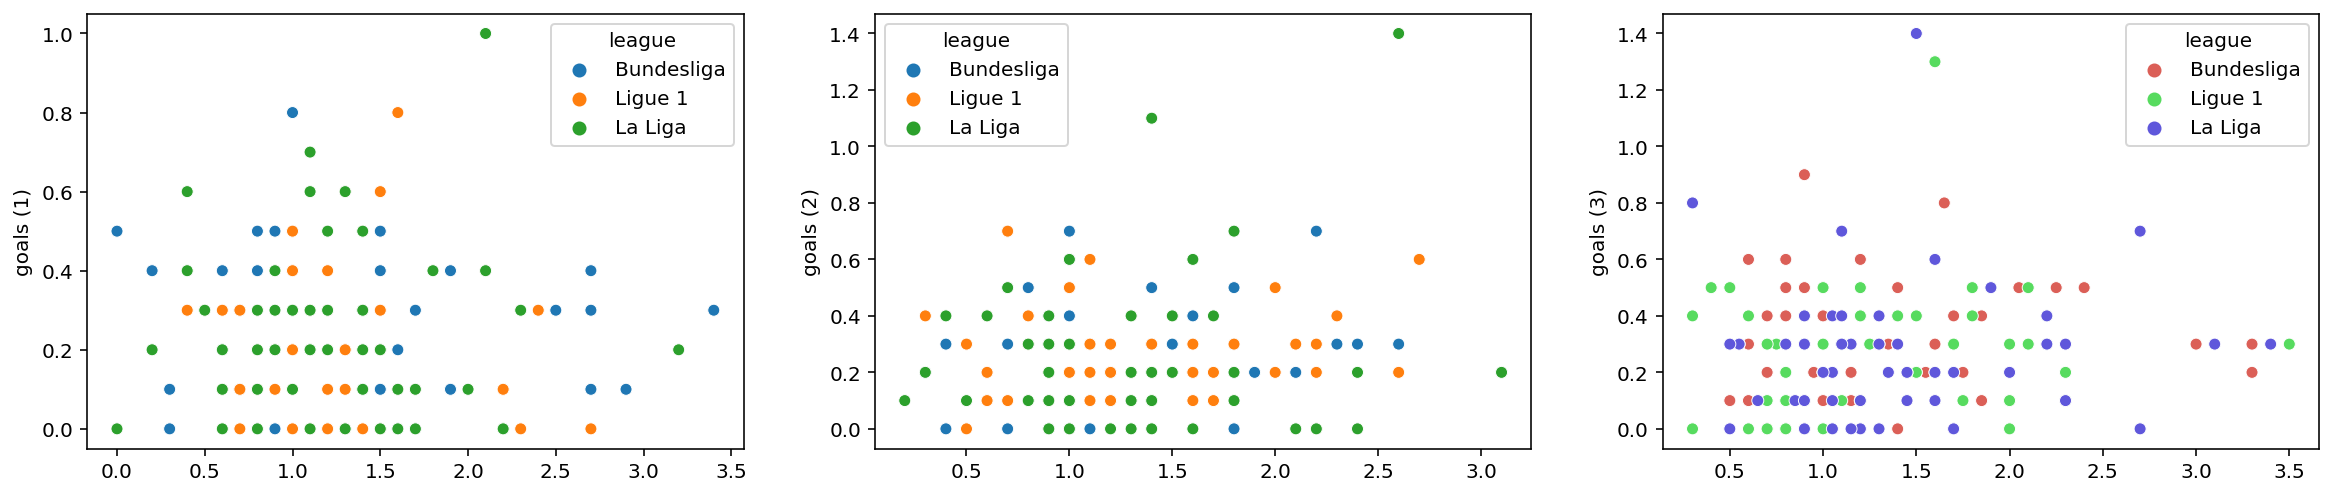

In [25]:
fig, axes = plt.subplots(1,3, figsize = (20,4))
axes[0] = sns.scatterplot(x = df['long_key_pass (1)'] + df['short_key_pass (1)'], y = df['goals (1)'], ax = axes[0], hue = df['league'])
axes[1] = sns.scatterplot(x = df['long_key_pass (2)'] + df['short_key_pass (2)'], y = df['goals (2)'], ax = axes[1], hue = df['league'])
axes[2] = sns.scatterplot(x = df['long_key_pass (3)'] + df['short_key_pass (3)'], y = df['goals (3)'], ax = axes[2], palette = 'hls', hue = df['league']);

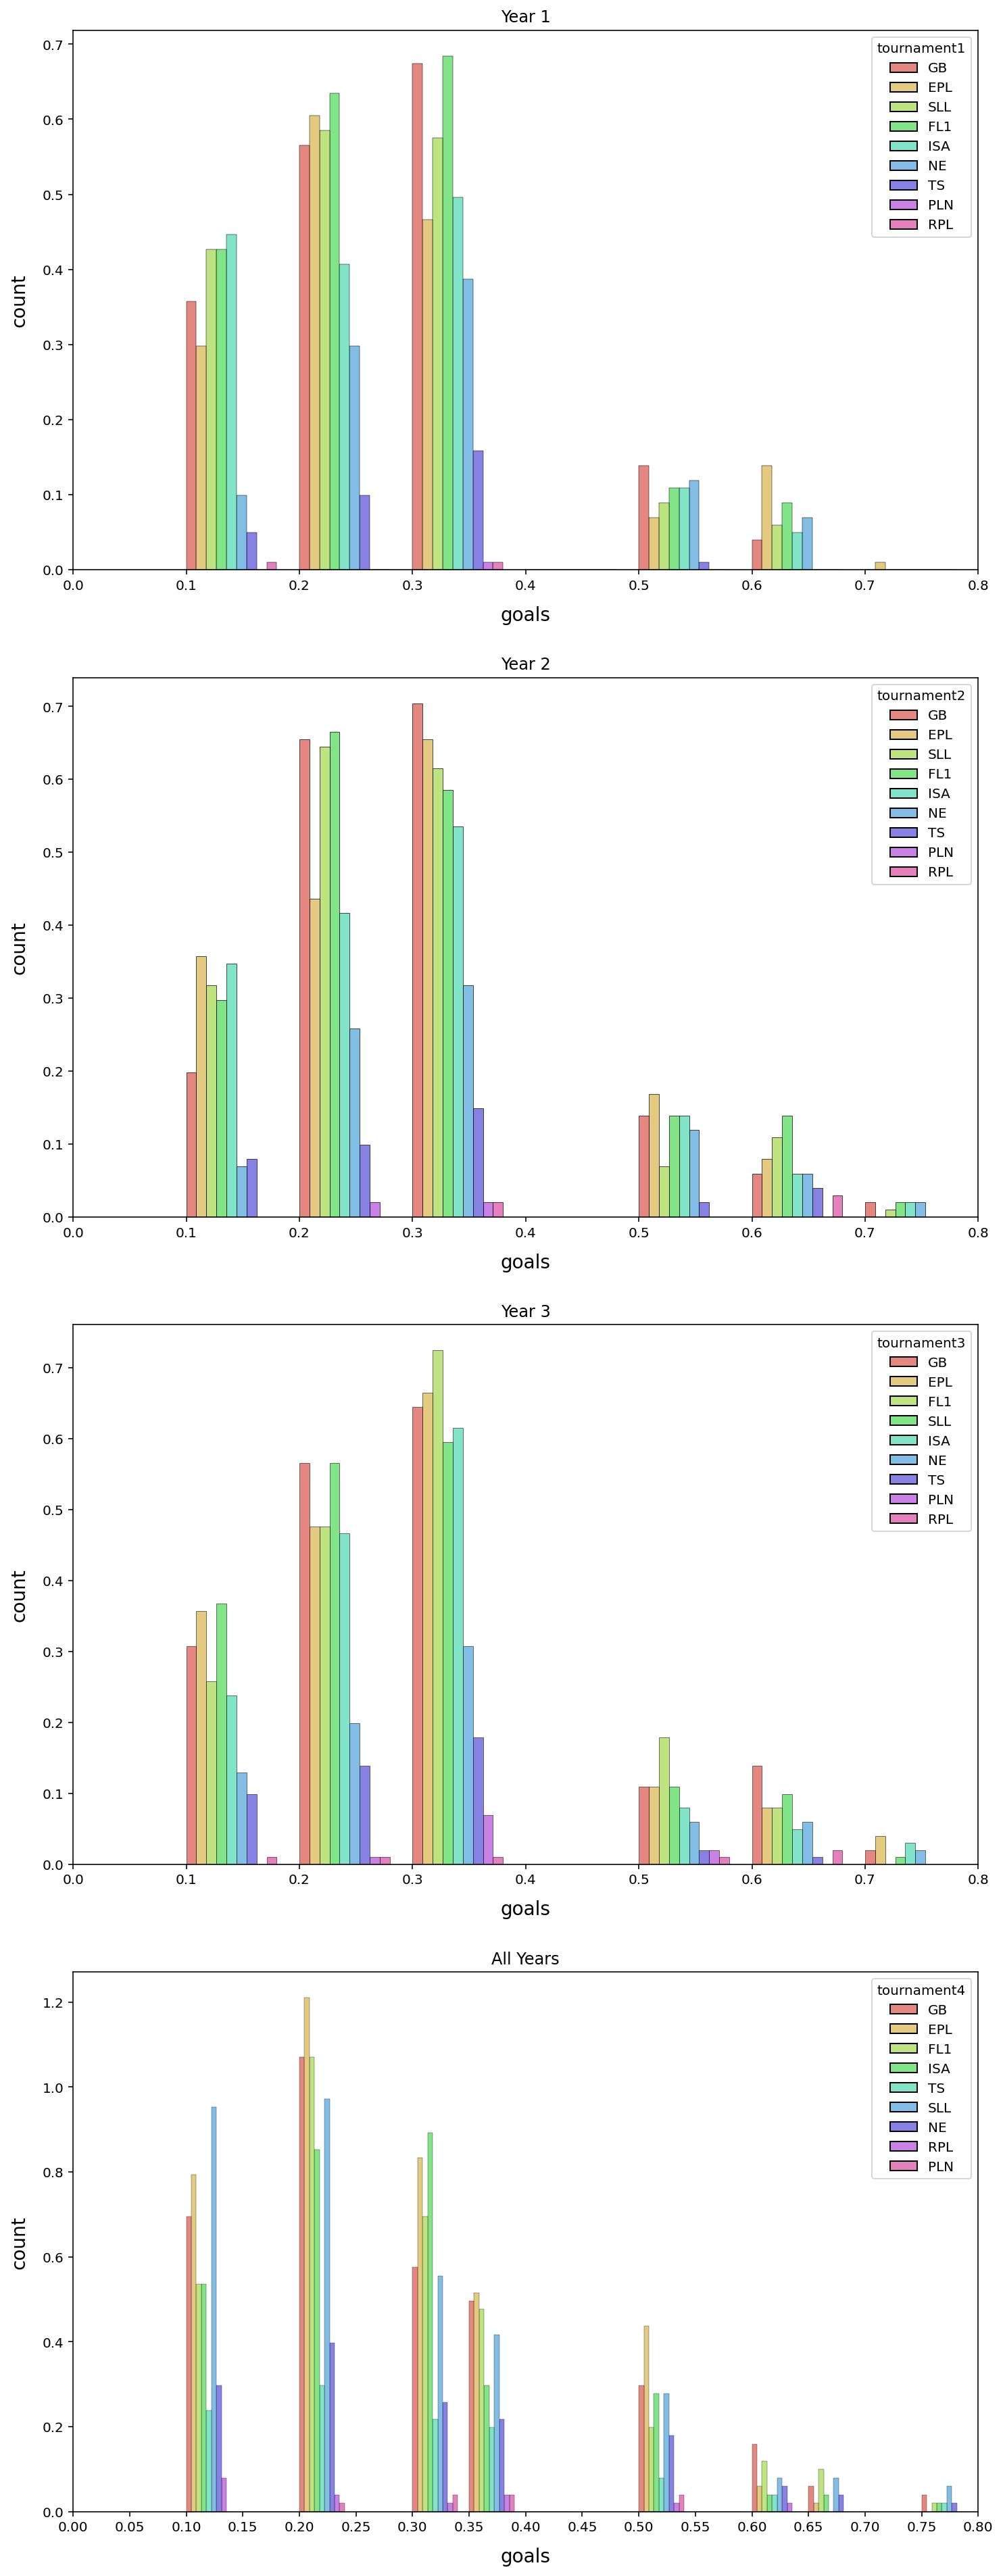

In [18]:
fig, axes = plt.subplots(4,1, figsize = (12,20))
plt.subplots_adjust(left=None, bottom = None, right=None, top=1.4, wspace=None, hspace=None)

axes[0] = sns.histplot(x = df['goals1'], stat = 'density', ax = axes[0], hue = df['tournament1'], multiple = 'dodge', shrink = .8, binwidth = .1, palette = 'hls')
axes[0].set_xticks(np.linspace(0, .8, 9))
axes[0].set_title('Year 1')
axes[0].set_xlim(0, .8)
axes[0].set_ylabel('count', fontsize = 14)
axes[0].set_xlabel('goals', fontsize = 14)
axes[0].xaxis.labelpad = 10
axes[0].yaxis.labelpad = 10 

axes[1] = sns.histplot(x = df['goals2'], stat = 'density', ax = axes[1], hue = df['tournament2'], multiple = 'dodge', shrink = .8, binwidth = .1, palette = 'hls')
axes[1].set_xticks(np.linspace(0, .8, 9))
axes[1].set_title('Year 2')
axes[1].set_xlim(0, .8)
axes[1].set_ylabel('count', fontsize = 14)
axes[1].set_xlabel('goals', fontsize = 14)
axes[1].xaxis.labelpad = 10
axes[1].yaxis.labelpad = 10 

axes[2] = sns.histplot(x = df['goals3'], stat = 'density', ax = axes[2], hue = df['tournament3'], multiple = 'dodge', shrink = .8, binwidth = .1, palette = 'hls')
axes[2].set_xticks(np.linspace(0, .8, 9))
axes[2].set_title('Year 3')
axes[2].set_xlim(0, .8)
axes[2].set_ylabel('count', fontsize = 14)
axes[2].set_xlabel('goals', fontsize = 14)
axes[2].xaxis.labelpad = 10
axes[2].yaxis.labelpad = 10 

axes[3] = sns.histplot(x = df['goals4'], stat = 'density', ax = axes[3], hue = df['tournament4'], bins = 10, multiple = 'dodge', shrink = .8, binwidth = .05, palette = 'hls')
axes[3].set_xticks(np.linspace(0, .8, 17))
axes[3].set_title('All Years')
axes[3].set_xlim(0, .8);
axes[3].set_ylabel('count', fontsize = 14)
axes[3].set_xlabel('goals', fontsize = 14)
axes[3].xaxis.labelpad = 10
axes[3].yaxis.labelpad = 10 

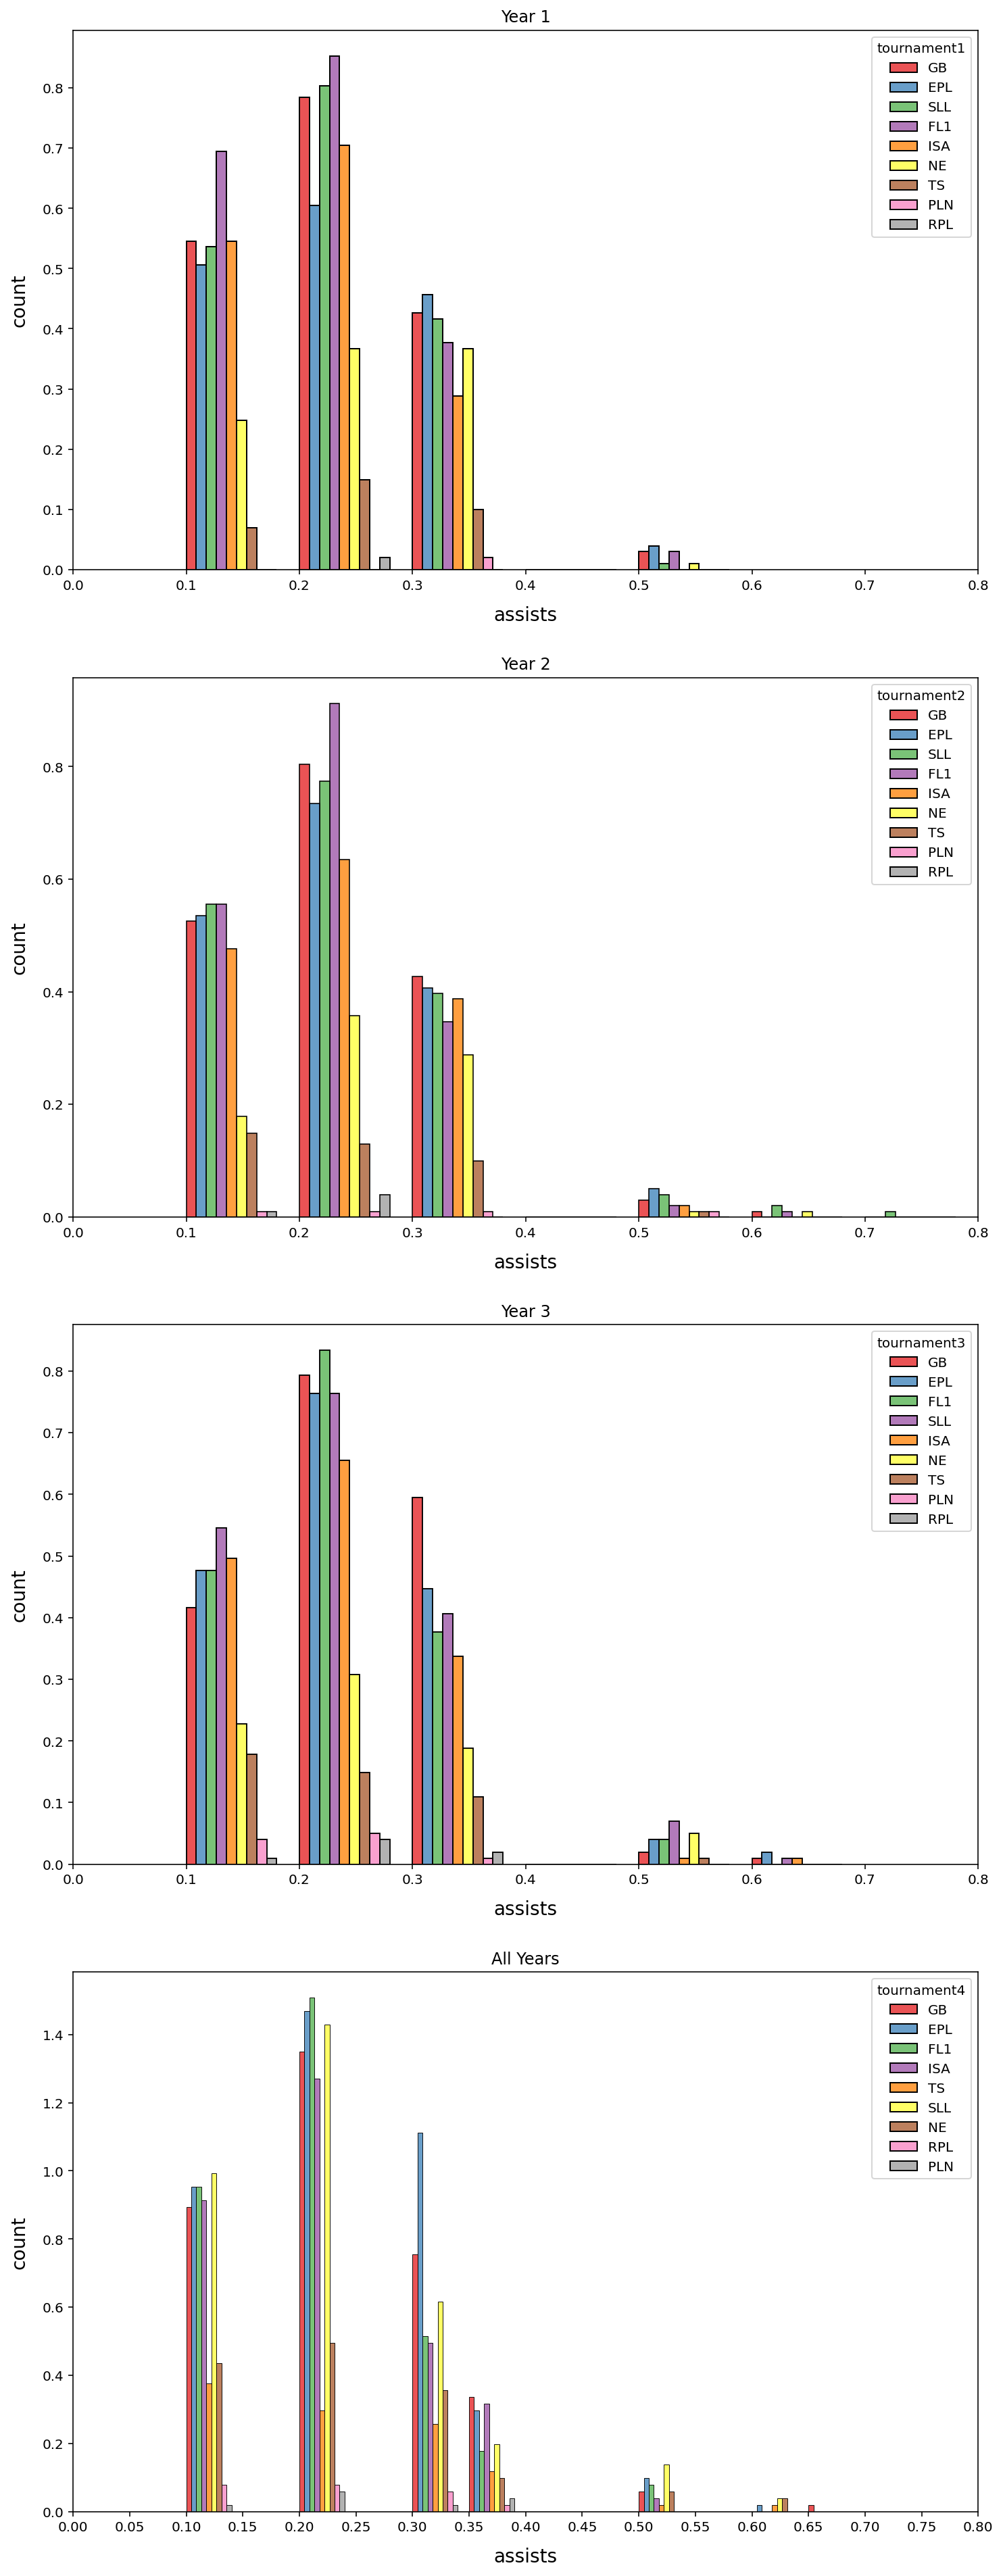

In [19]:
fig, axes = plt.subplots(4,1, figsize = (12,20))
plt.subplots_adjust(left=None, bottom = None, right=None, top=1.4, wspace=None, hspace=None)

axes[0] = sns.histplot(x = df['assists1'], stat = 'density', ax = axes[0], hue = df['tournament1'], multiple = 'dodge', shrink = .8, binwidth = .1, palette = 'Set1')
axes[0].set_xticks(np.linspace(0, .8, 9))
axes[0].set_title('Year 1')
axes[0].set_xlim(0, .8)
axes[0].set_ylabel('count', fontsize = 14)
axes[0].set_xlabel('assists', fontsize = 14)
axes[0].xaxis.labelpad = 10
axes[0].yaxis.labelpad = 10 

axes[1] = sns.histplot(x = df['assists2'], stat = 'density', ax = axes[1], hue = df['tournament2'], multiple = 'dodge', shrink = .8, binwidth = .1, palette = 'Set1')
axes[1].set_xticks(np.linspace(0, .8, 9))
axes[1].set_title('Year 2')
axes[1].set_xlim(0, .8)
axes[1].set_ylabel('count', fontsize = 14)
axes[1].set_xlabel('assists', fontsize = 14)
axes[1].xaxis.labelpad = 10
axes[1].yaxis.labelpad = 10 

axes[2] = sns.histplot(x = df['assists3'], stat = 'density', ax = axes[2], hue = df['tournament3'], multiple = 'dodge', shrink = .8, binwidth = .1, palette = 'Set1')
axes[2].set_xticks(np.linspace(0, .8, 9))
axes[2].set_title('Year 3')
axes[2].set_xlim(0, .8)
axes[2].set_ylabel('count', fontsize = 14)
axes[2].set_xlabel('assists', fontsize = 14)
axes[2].xaxis.labelpad = 10
axes[2].yaxis.labelpad = 10 

axes[3] = sns.histplot(x = df['assists4'], stat = 'density', ax = axes[3], hue = df['tournament4'], bins = 10, multiple = 'dodge', shrink = .8, binwidth = .05, palette = 'Set1')
axes[3].set_xticks(np.linspace(0, .8, 17))
axes[3].set_title('All Years')
axes[3].set_xlim(0, .8);
axes[3].set_ylabel('count', fontsize = 14)
axes[3].set_xlabel('assists', fontsize = 14)
axes[3].xaxis.labelpad = 10
axes[3].yaxis.labelpad = 10  

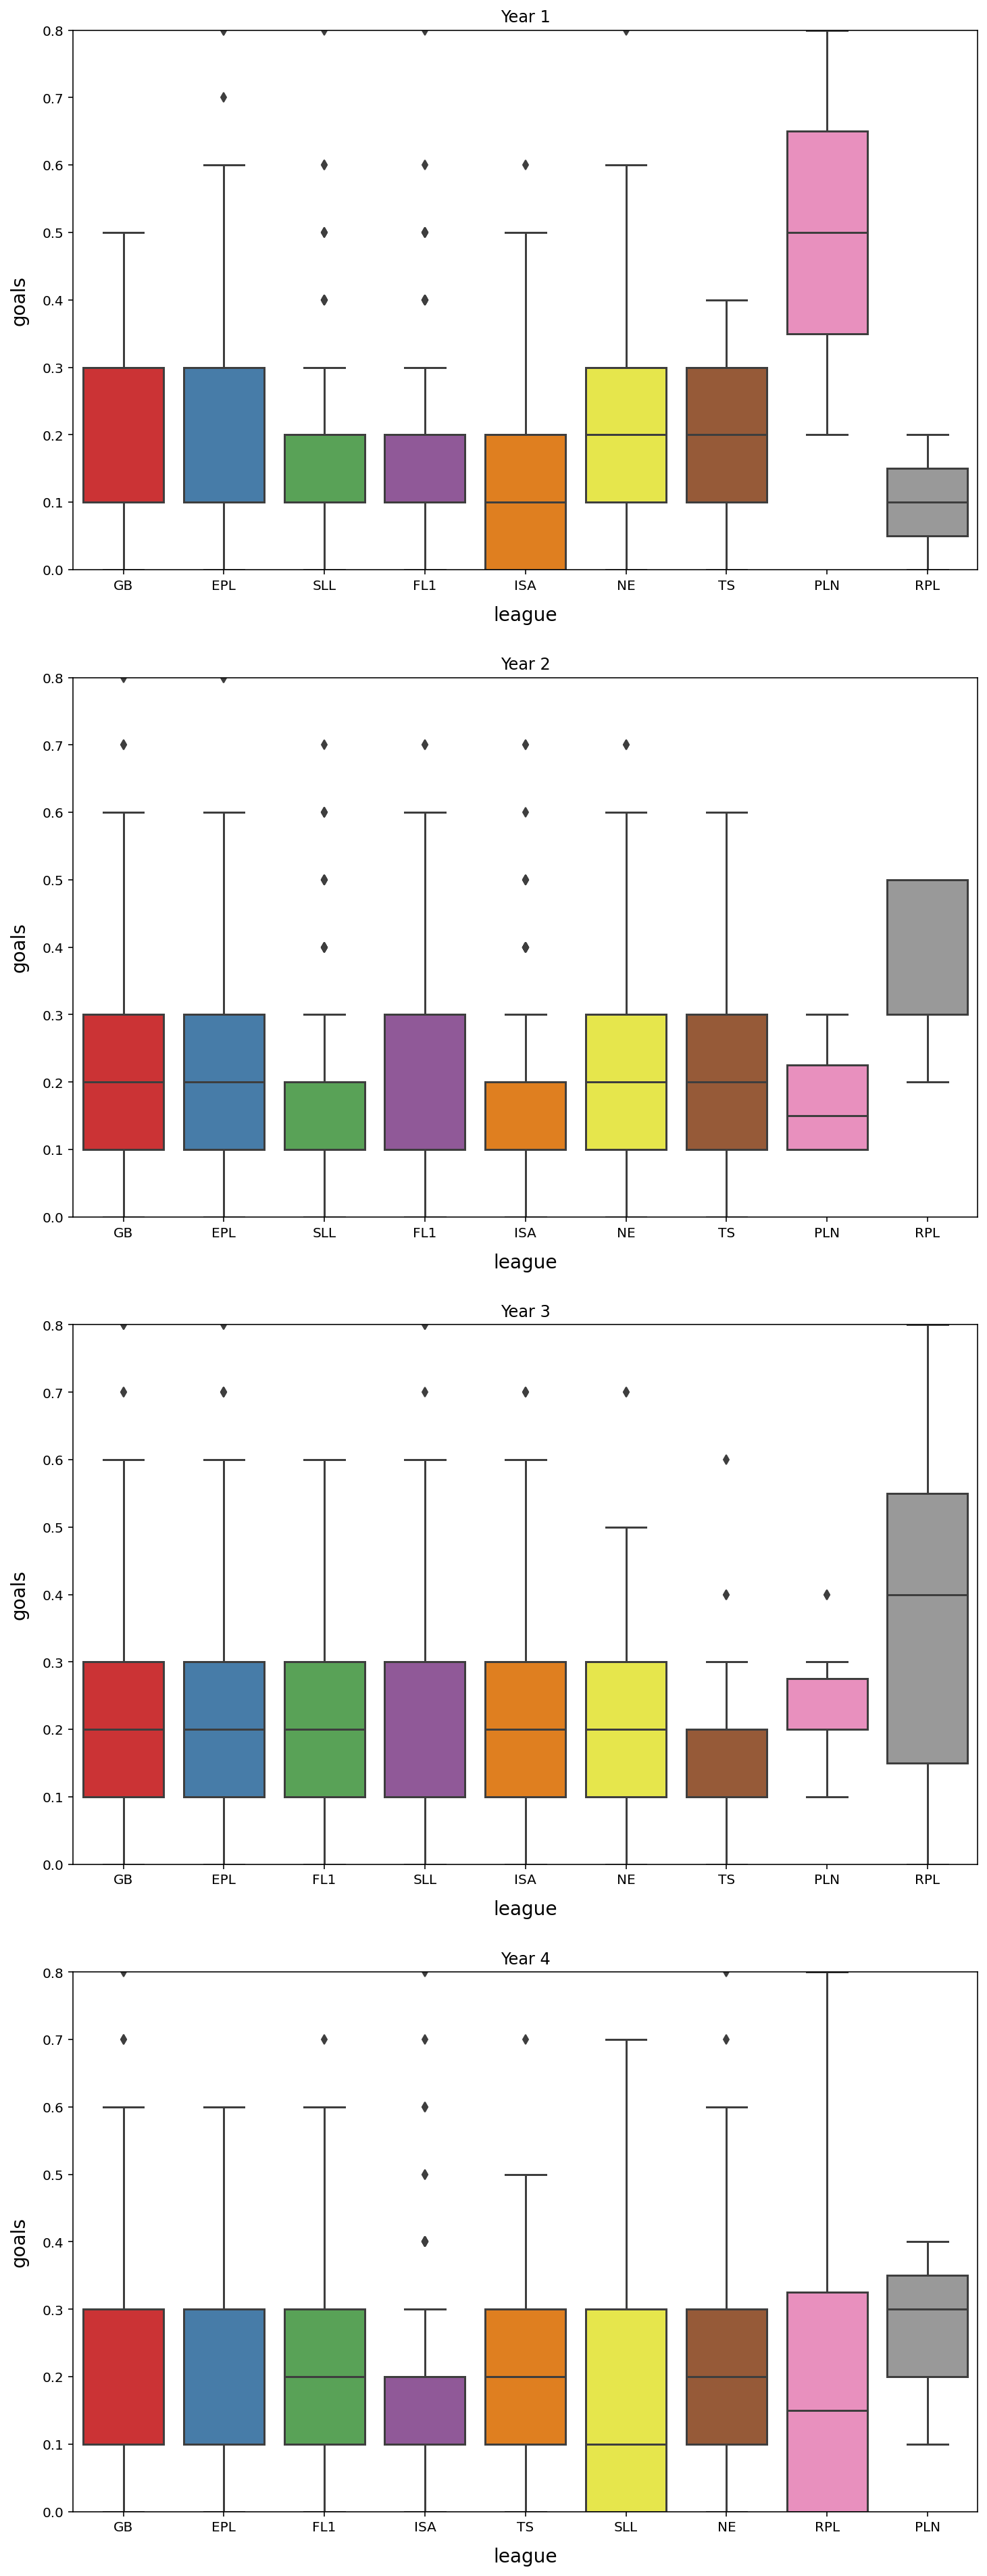

In [20]:
fig, axes = plt.subplots(4,1, figsize = (12,20))
plt.subplots_adjust(left=None, bottom = None, right=None, top=1.4, wspace=None, hspace=None)

axes[0] = sns.boxplot(x = df['tournament1'], y = df['goals1'], data = df, ax = axes[0], palette = 'Set1')
axes[0].set_title('Year 1')
axes[0].set_ylim(0, .8)
axes[0].set_ylabel('goals', fontsize = 14)
axes[0].set_xlabel('league', fontsize = 14)
axes[0].xaxis.labelpad = 10
axes[0].yaxis.labelpad = 10 

axes[1] = sns.boxplot(x = df['tournament2'], y = df['goals2'], data = df, ax = axes[1], palette = 'Set1')
axes[1].set_title('Year 2')
axes[1].set_ylim(0, .8)
axes[1].set_ylabel('goals', fontsize = 14)
axes[1].set_xlabel('league', fontsize = 14)
axes[1].xaxis.labelpad = 10
axes[1].yaxis.labelpad = 10

axes[2] = sns.boxplot(x = df['tournament3'], y = df['goals3'], data = df, ax = axes[2], palette = 'Set1')
axes[2].set_title('Year 3')
axes[2].set_ylim(0, .8)
axes[2].set_ylabel('goals', fontsize = 14)
axes[2].set_xlabel('league', fontsize = 14)
axes[2].xaxis.labelpad = 10
axes[2].yaxis.labelpad = 10 

axes[3] = sns.boxplot(x = df['tournament4'], y = df['goals4'], data = df, ax = axes[3], palette = 'Set1')
axes[3].set_title('Year 4')
axes[3].set_ylim(0, .8)
axes[3].set_ylabel('goals', fontsize = 14)
axes[3].set_xlabel('league', fontsize = 14)
axes[3].xaxis.labelpad = 10
axes[3].yaxis.labelpad = 10 

In [21]:
a_list = []

In [22]:
for index, row in df.iterrows():
    for number in range(1,5):
        x = row['tournament' + str(number)]
        a_list.append((x, row['goals' + str(number)]))

In [23]:
tourn_df = pd.DataFrame(data = a_list, columns = ['tournament', 'values'])

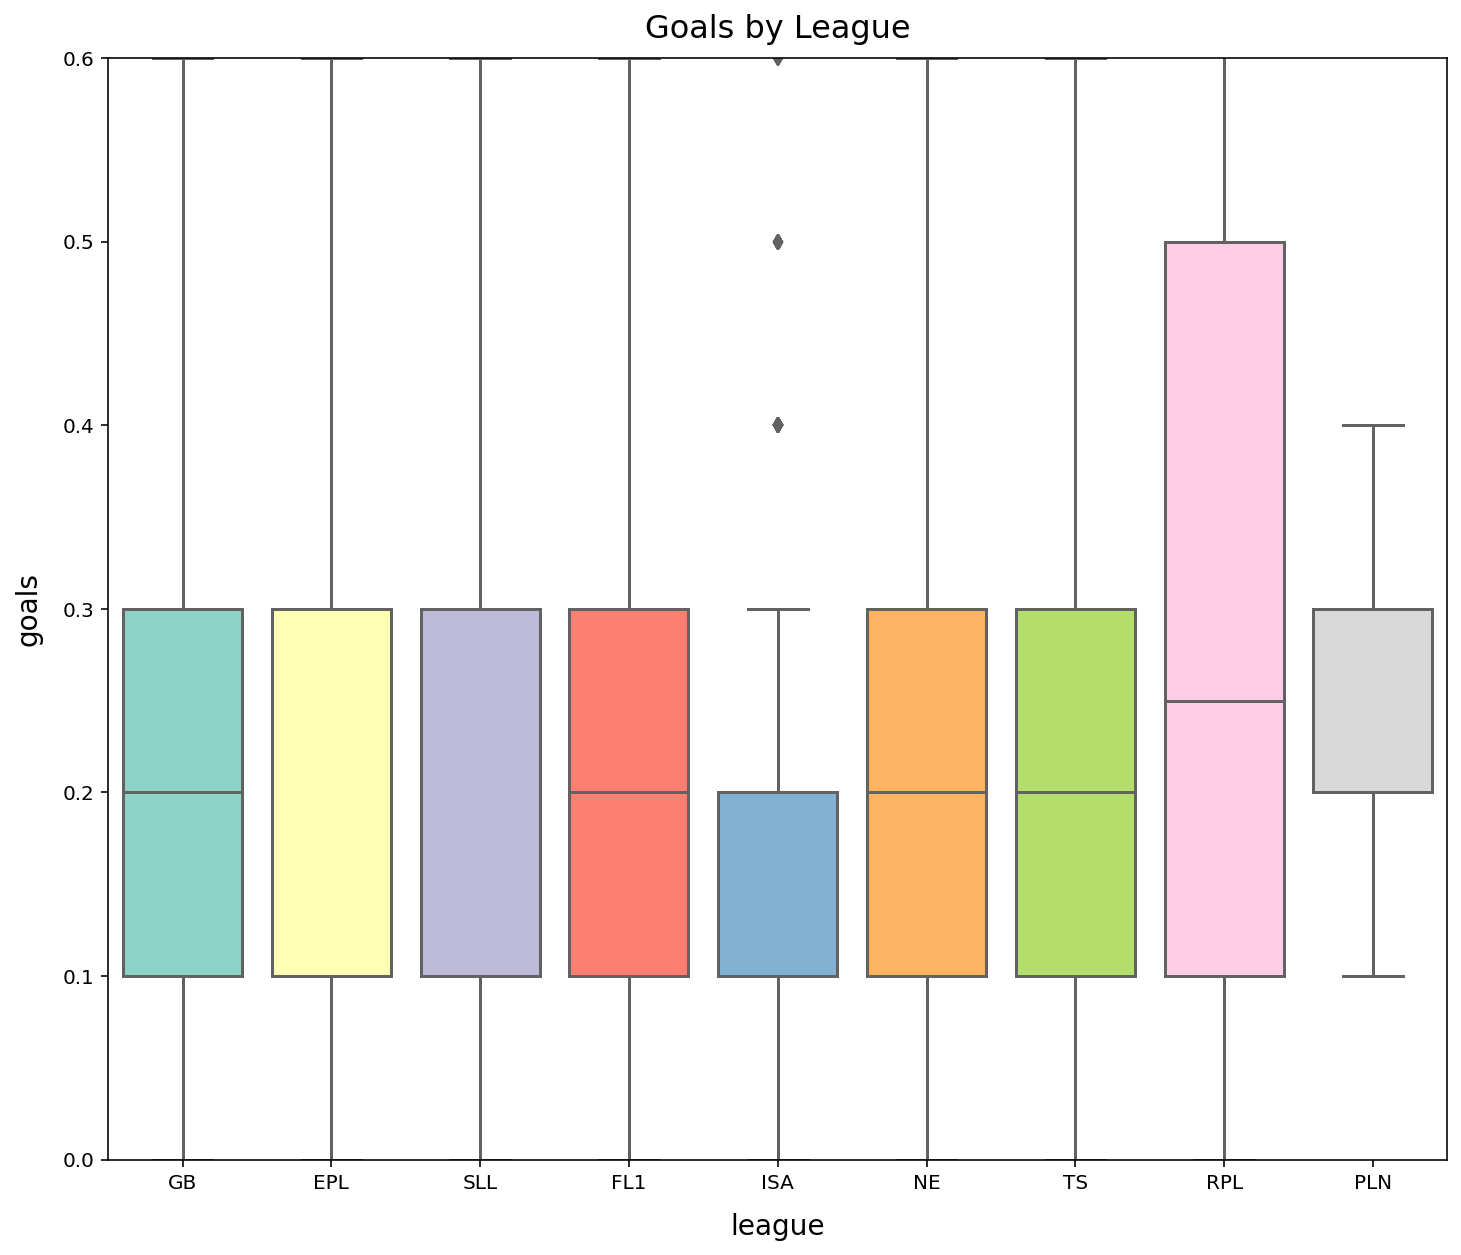

In [49]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
plt.subplots_adjust(left=None, bottom = None, right=None, top=1.4, wspace=None, hspace=None)

ax = sns.boxplot(x = tourn_df['tournament'], y = tourn_df['values'], data = tourn_df, ax = ax, palette = 'Set3', saturation = 1)
ax.set_title('Goals by League', fontsize = 16, pad = 10)
ax.set_ylim(0, .6)
ax.set_ylabel('goals', fontsize = 14)
ax.set_xlabel('league', fontsize = 14)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
plt.savefig('images/goals_by_league.png', dpi = 300, bbox_inches = "tight", transparent = True)

In [25]:
b_list = []

In [26]:
for index, row in df.iterrows():
    for number in range(1,5):
        x = row['tournament' + str(number)]
        b_list.append((x, row['long_key_pass' + str(number)] + row['short_key_pass' + str(number)]))

In [27]:
kp_df = pd.DataFrame(data = b_list, columns = ['tournament', 'values'])

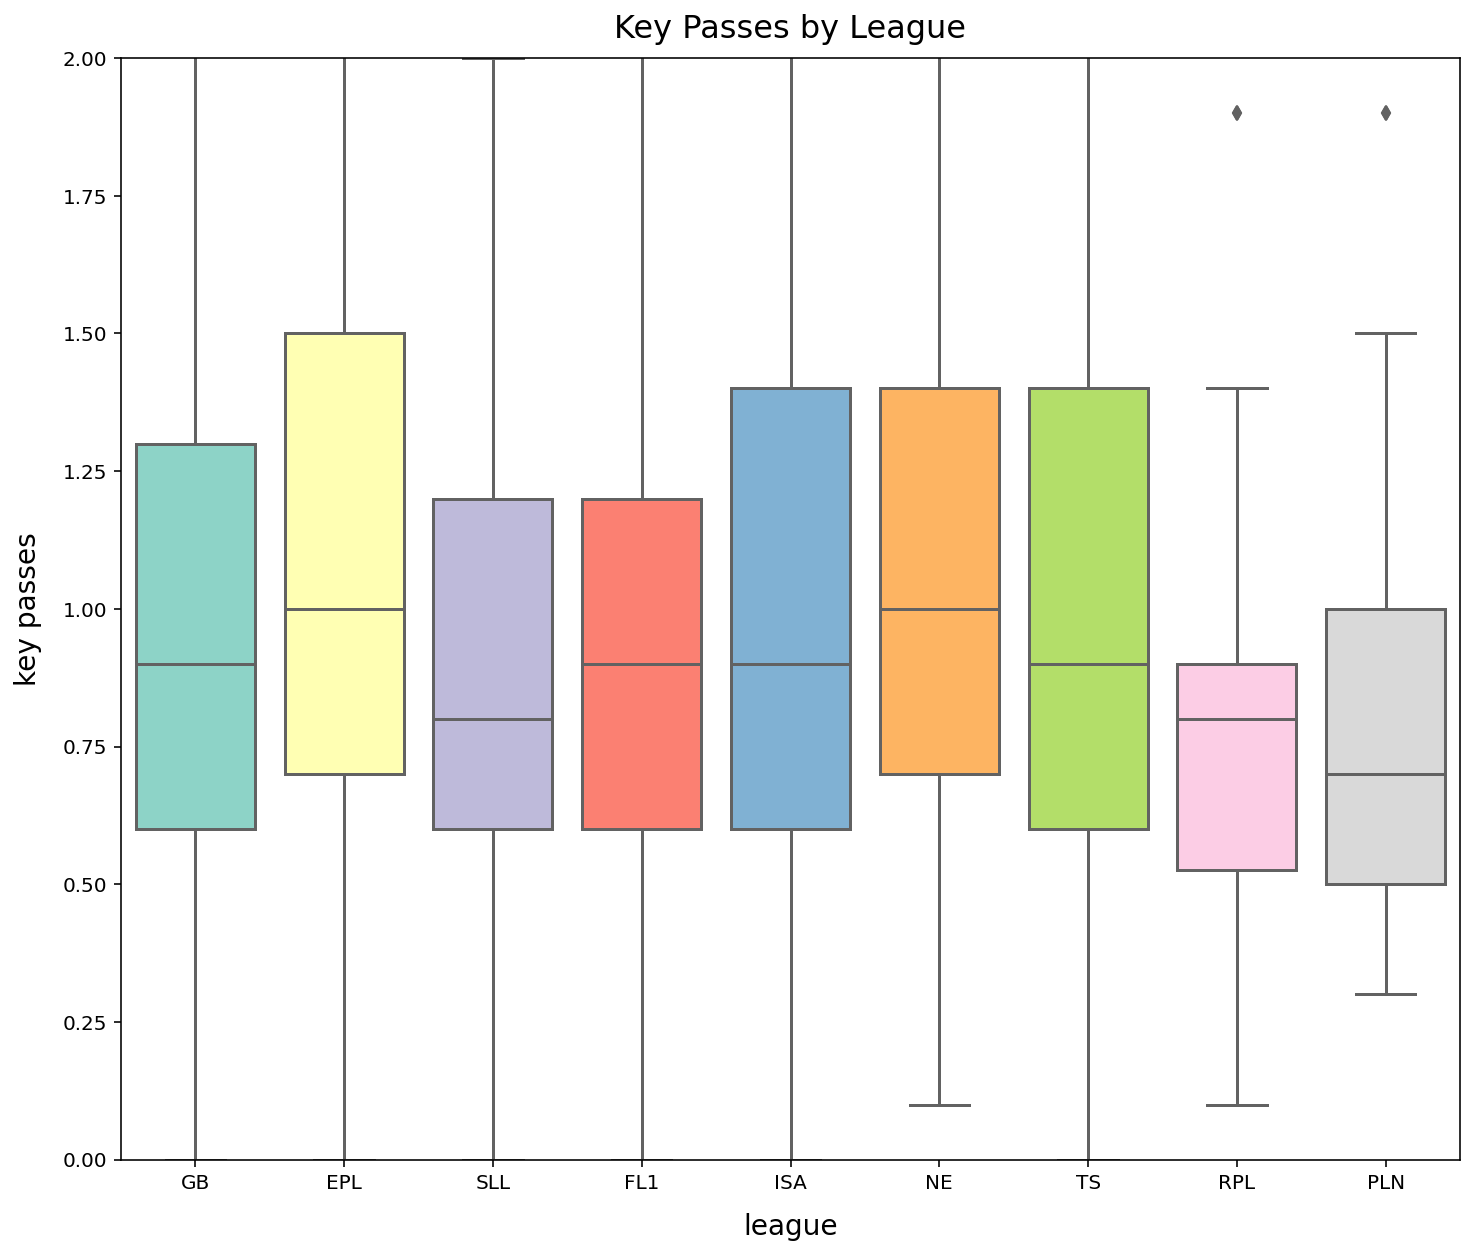

In [50]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
plt.subplots_adjust(left=None, bottom = None, right=None, top=1.4, wspace=None, hspace=None)

ax = sns.boxplot(x = kp_df['tournament'], y = kp_df['values'], data = kp_df, ax = ax, palette = 'Set3', saturation = 1)
ax.set_title('Key Passes by League', fontsize = 16, pad = 10)
ax.set_ylim(0, 2)
ax.set_ylabel('key passes', fontsize = 14)
ax.set_xlabel('league', fontsize = 14)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10 
plt.savefig('images/key_passes_by_league.png', dpi = 300, bbox_inches = "tight", transparent = True)

In [29]:
c_list = []

In [31]:
for index, row in df.iterrows():
    for number in range(1,5):
        x = row['tournament' + str(number)]
        c_list.append((x, row['total_passes' + str(number)]))

In [32]:
p_df = pd.DataFrame(data = c_list, columns = ['tournament', 'values'])

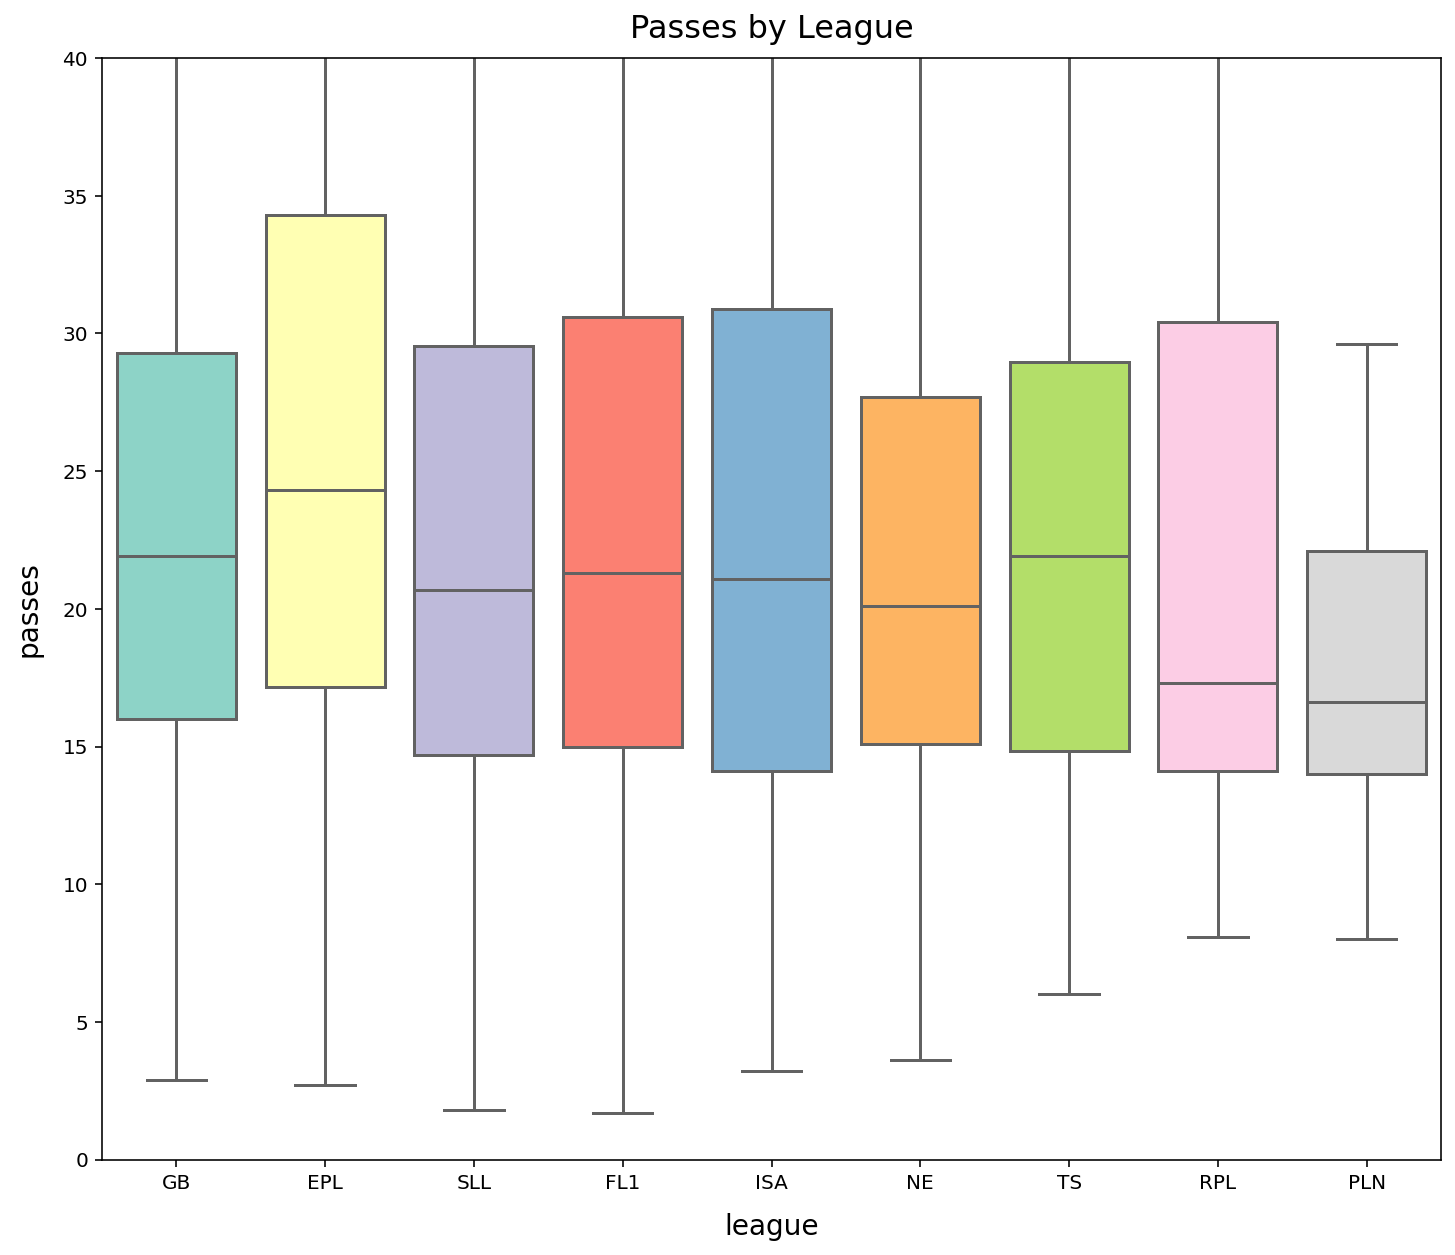

In [52]:
fig, ax = plt.subplots(1,1, figsize = (12,6))
plt.subplots_adjust(left=None, bottom = None, right=None, top=1.4, wspace=None, hspace=None)

ax = sns.boxplot(x = p_df['tournament'], y = p_df['values'], data = p_df, ax = ax, palette = 'Set3', saturation = 1)
ax.set_title('Passes by League', fontsize = 16, pad = 10)
ax.set_ylim(0, 40)
ax.set_ylabel('passes', fontsize = 14)
ax.set_xlabel('league', fontsize = 14)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10 
plt.savefig('images/passes_by_league.png', dpi = 300, bbox_inches = "tight", transparent = True)

In [101]:
df.columns

Index(['name1', 'age1', 'season1', 'tournament1', 'club1', 'apps1', 'mins1',
       'shots (off target)1', 'shots (on target)1', 'shots (blocked)1',
       ...
       'accurate_short_pass (aggregated)',
       'inaccurate_short_pass (aggregated)', 'accurate_crosses (aggregated)',
       'inaccurate_crosses (aggregated)', 'long_key_pass (aggregated)',
       'short_key_pass (aggregated)', 'assists (aggregated)',
       'shots_blocked/on_target_shots (aggregated)',
       'g_square_root  (aggregated)', 'g_cube_root  (aggregated)'],
      dtype='object', length=154)

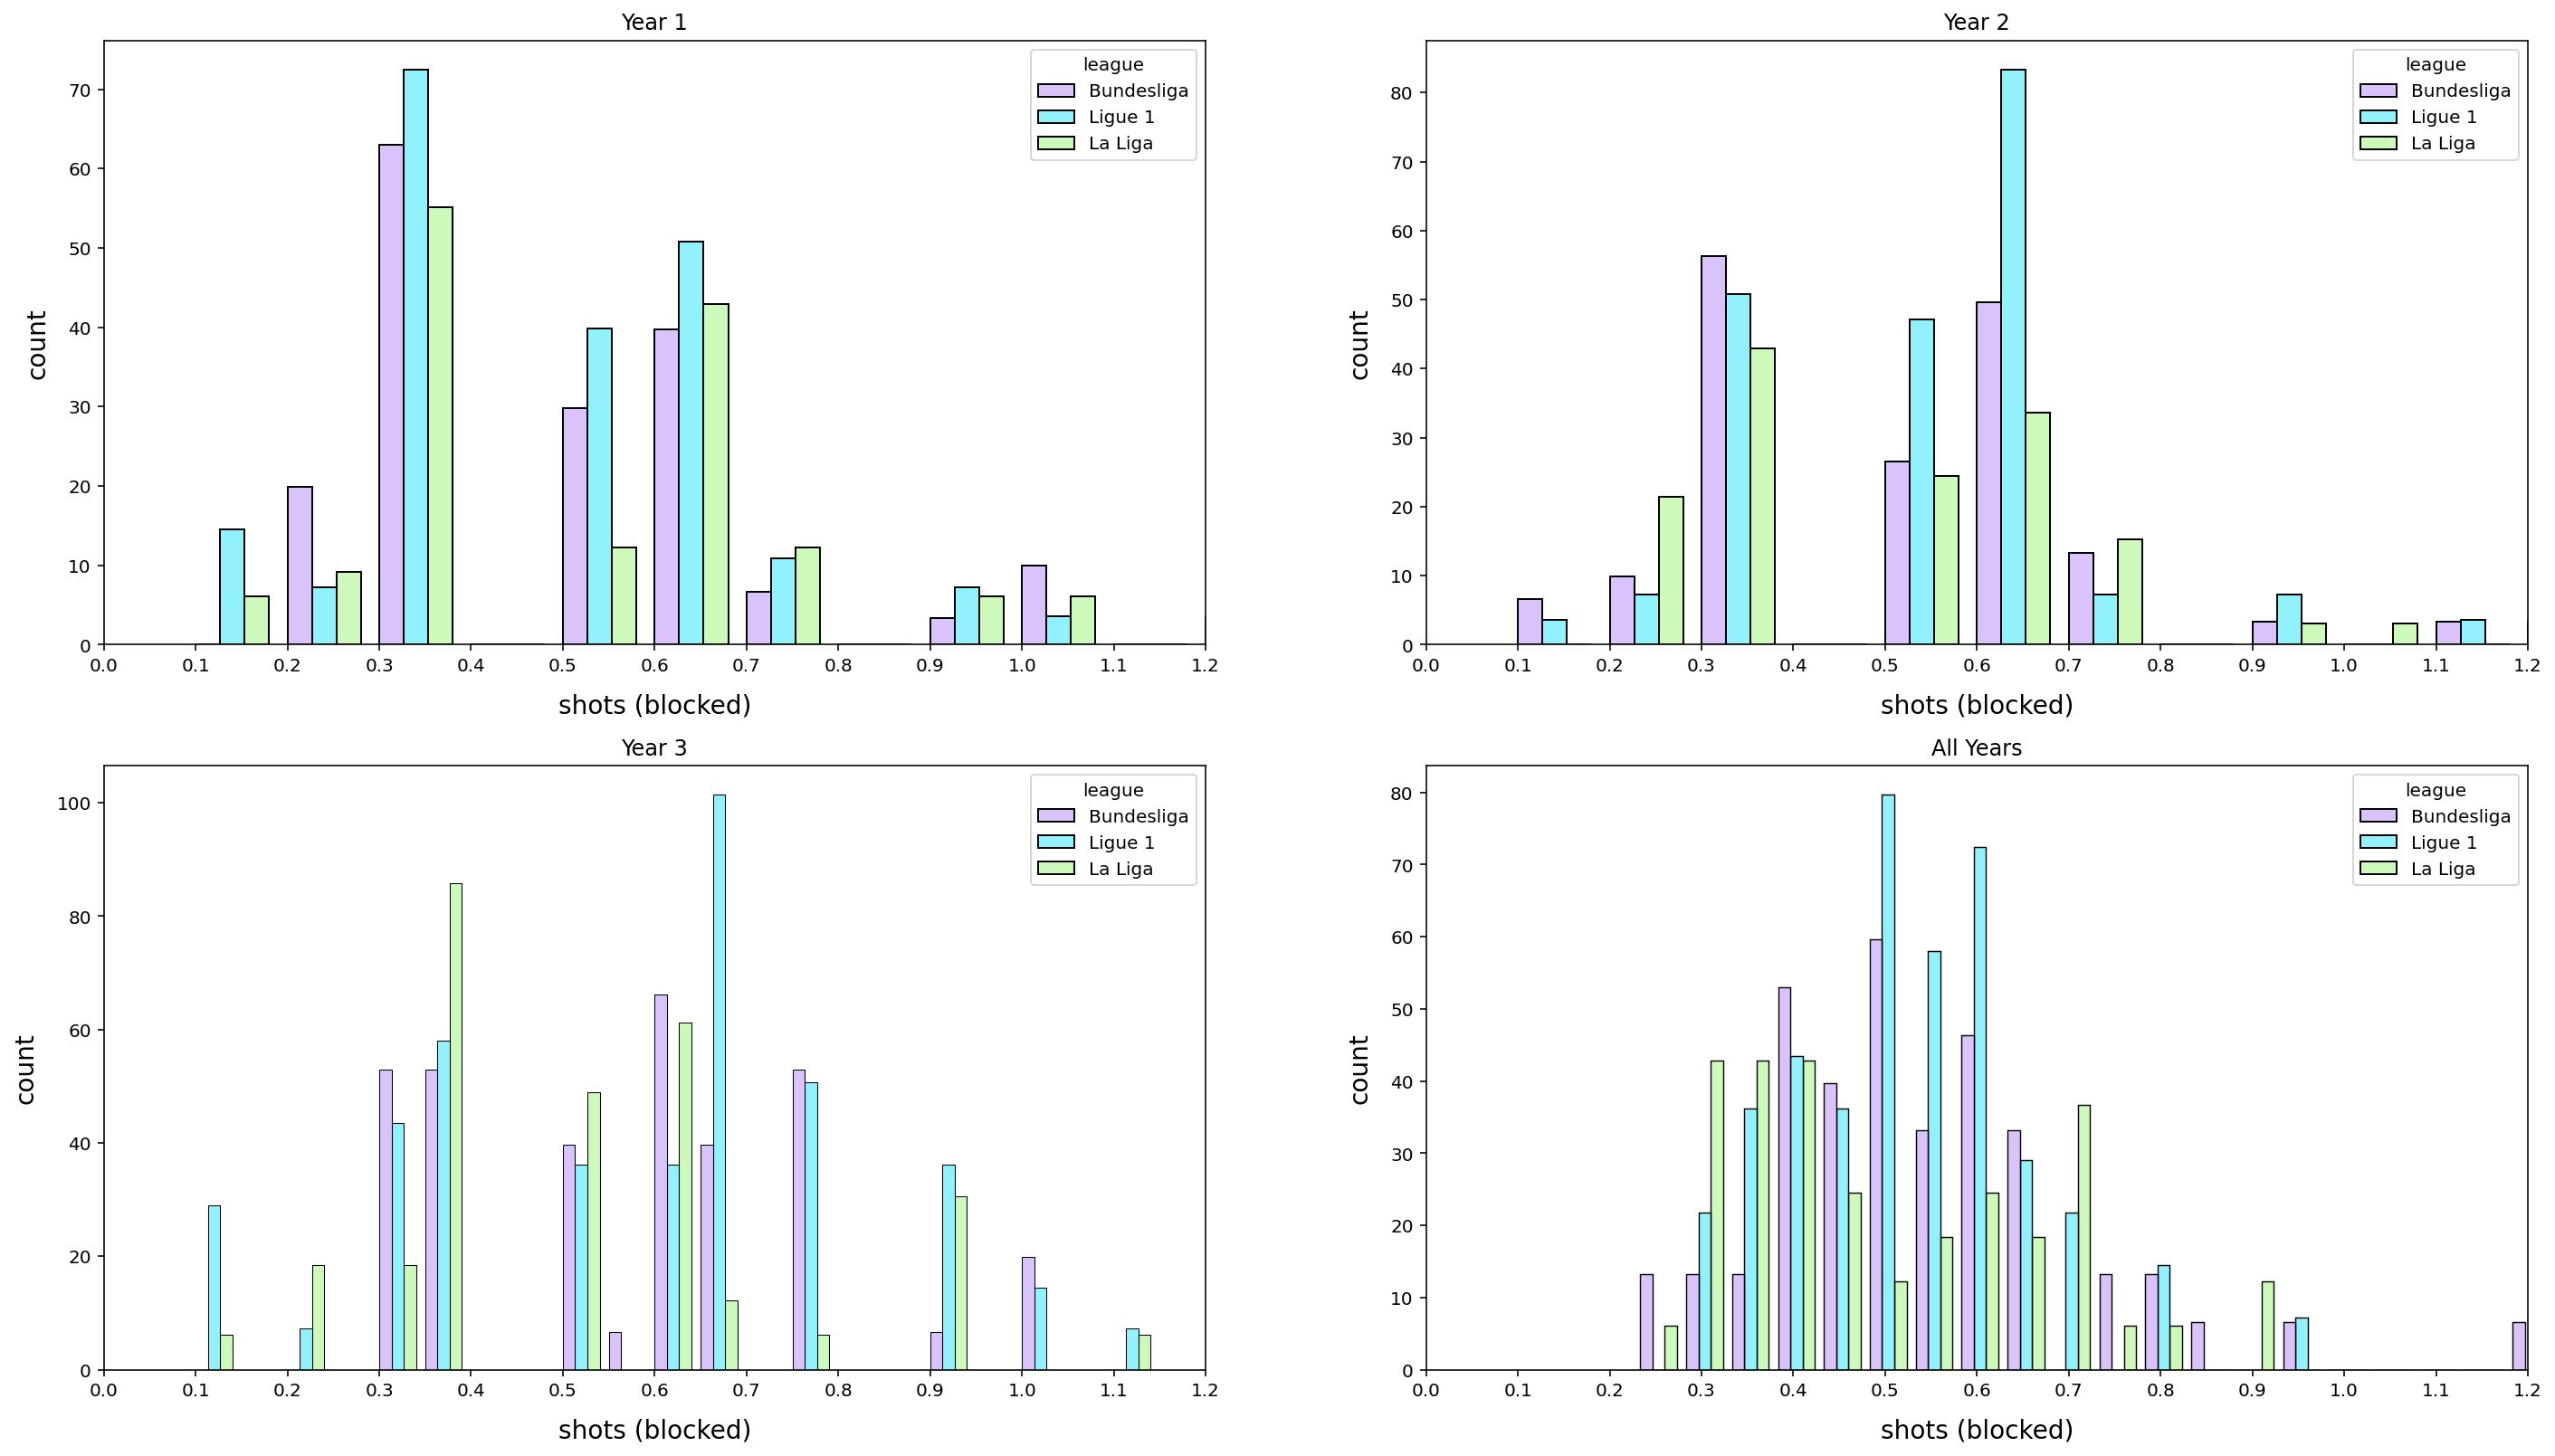

In [39]:
fig, axes = plt.subplots(2,2, figsize = (24,8))
plt.subplots_adjust(left=None, bottom = None, right=None, top=1.4, wspace=None, hspace=None)

axes[0,0] = sns.histplot(x = df['shots (blocked) (1)'], stat = 'frequency', ax = axes[0,0], hue = df['league'], multiple = 'dodge', shrink = .8, binwidth = .1, palette = ['xkcd:pale violet', "xkcd:robin's egg", "xkcd:tea green"])
axes[0,0].set_xticks(np.linspace(0, 1.2, 13))
axes[0,0].set_title('Year 1')
axes[0,0].set_xlim(0, 1.2)
axes[0,0].set_ylabel('count', fontsize = 14)
axes[0,0].set_xlabel('shots (blocked)', fontsize = 14)
axes[0,0].xaxis.labelpad = 10
axes[0,0].yaxis.labelpad = 10 

axes[0,1] = sns.histplot(x = df['shots (blocked) (2)'], stat = 'frequency', ax = axes[0,1], hue = df['league'], multiple = 'dodge', shrink = .8, binwidth = .1, palette = ['xkcd:pale violet', "xkcd:robin's egg", "xkcd:tea green"])
axes[0,1].set_xticks(np.linspace(0, 1.2, 13))
axes[0,1].set_title('Year 2')
axes[0,1].set_xlim(0, 1.2)
axes[0,1].set_ylabel('count', fontsize = 14)
axes[0,1].set_xlabel('shots (blocked)', fontsize = 14)
axes[0,1].xaxis.labelpad = 10
axes[0,1].yaxis.labelpad = 10 

axes[1,0] = sns.histplot(x = df['shots (blocked) (3)'], stat = 'frequency', ax = axes[1,0], hue = df['league'], multiple = 'dodge', shrink = .8, binwidth = .05, palette = ['xkcd:pale violet', "xkcd:robin's egg", "xkcd:tea green"])
axes[1,0].set_xticks(np.linspace(0, 1.2, 13))
axes[1,0].set_title('Year 3')
axes[1,0].set_xlim(0, 1.2)
axes[1,0].set_ylabel('count', fontsize = 14)
axes[1,0].set_xlabel('shots (blocked)', fontsize = 14)
axes[1,0].xaxis.labelpad = 10
axes[1,0].yaxis.labelpad = 10 

axes[1,1] = sns.histplot(x = df['shots (blocked) (aggregated)'], stat = 'frequency', ax = axes[1,1], hue = df['league'], bins = 10, multiple = 'dodge', shrink = .8, binwidth = .05, palette = ['xkcd:pale violet', "xkcd:robin's egg", "xkcd:tea green"])
axes[1,1].set_xticks(np.linspace(0, 1.2, 13))
axes[1,1].set_title('All Years')
axes[1,1].set_xlim(0, 1.2);
axes[1,1].set_ylabel('count', fontsize = 14)
axes[1,1].set_xlabel('shots (blocked)', fontsize = 14)
axes[1,1].xaxis.labelpad = 10
axes[1,1].yaxis.labelpad = 10 